In [3]:
!pip install colossus

You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


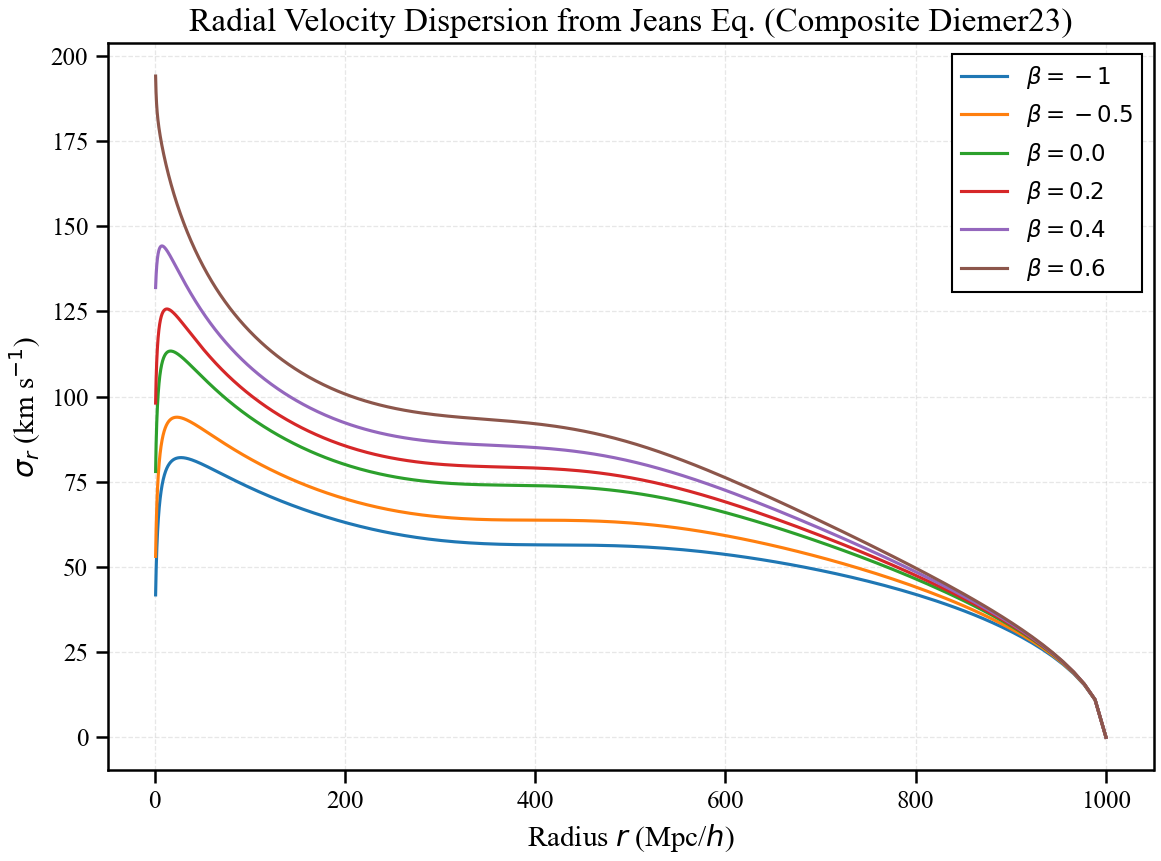

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from colossus.halo import profile_composite

# =========================================
# Cosmology and halo/profile specification
# =========================================
cosmology.setCosmology('planck18')

M   = 1e12   # Msun/h
c   = 10.0
z   = 0.0
mdef = 'vir'

# Composite profile
p = profile_composite.compositeProfile(
    'diemer23',
    outer_names=['mean', 'infalling'],
    M=M, c=c, z=z, mdef=mdef,
    pl_delta_1=10.0, pl_s=1.5
)

# =========================
# Radius grid (kpc/h)
# =========================
r = np.logspace(0, 3, 600)   # 1 ... 1000 kpc/h

# Pull density and circular velocity
rho = p.density(r)           # Msun/h/kpc^3
Vc  = p.circularVelocity(r)  # km/s


# =====================================
# Jeans solver
# =====================================
def solve_sigma_r2(r, rho, Vc, beta=0.0):
    r = np.asarray(r)
    rho = np.asarray(rho)
    Vc = np.asarray(Vc)

    if np.isscalar(beta):
        beta_arr = np.full_like(r, float(beta))
    else:
        beta_arr = np.asarray(beta)
        if beta_arr.shape != r.shape:
            raise ValueError("beta array must have same shape as r")

    RHS = -rho * (Vc**2) / r

    integrand = 2.0 * beta_arr / r
    cum_int = np.zeros_like(r)
    cum_int[1:] = np.cumsum(0.5 * (integrand[1:] + integrand[:-1]) * (r[1:] - r[:-1]))
    mu = np.exp(cum_int)

    I = mu * RHS
    I_rev = I[::-1]
    r_rev = r[::-1]

    J_rev = np.zeros_like(I_rev)
    dr_rev = r_rev[:-1] - r_rev[1:]
    J_rev[1:] = np.cumsum(0.5 * (I_rev[1:] + I_rev[:-1]) * dr_rev)
    J = J_rev[::-1]

    y = J / mu
    sigma_r2 = np.where(rho > 0, y / rho, 0.0)
    return sigma_r2


# =========================
# Plot for multiple betas
# =========================
beta_values = [-1,-0.5,0.0, 0.2, 0.4, 0.6]  # isotropic to radial
plt.figure(figsize=(8, 6))

for beta in beta_values:
    sigma_r2 =(solve_sigma_r2(r, rho, Vc, beta=beta))
    plt.plot(r, np.sqrt(-sigma_r2), label=fr'$\beta={beta}$')

plt.xlabel(r'Radius $r$ (Mpc/$h$)')
plt.ylabel(r'$\sigma_r$ (km s$^{-1}$)')
plt.title('Radial Velocity Dispersion from Jeans Eq. (Composite Diemer23)')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.6)
plt.tight_layout()
plt.show()


OrderedDict([('rhos', 6378795.928070417), ('rs', 20.311309856581044)])
OrderedDict([('rhos', 1450301.4387155243), ('rs', 20.311309856581044), ('alpha', 0.1610981005232897)])
OrderedDict([('rhos', 1546932.032461308), ('rs', 20.311309856581037), ('rt', 303.91481493355593), ('alpha', 0.18), ('beta', 3.0)])
OrderedDict([('rhos', 1430321.1597078643), ('rs', 20.311309856581033), ('rt', 306.41515761047697), ('alpha', 0.18), ('beta', 3.0), ('pl_delta_1', 10.0), ('pl_s', 1.5), ('pl_zeta', 0.5), ('pl_delta_max', 100.0)])


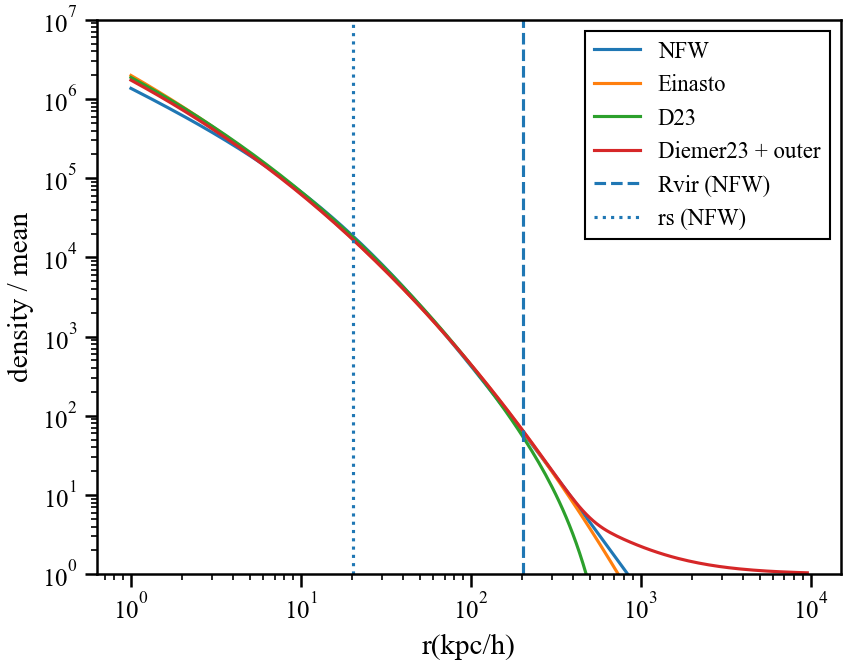

In [3]:
from colossus.halo import profile_nfw
from colossus.cosmology import cosmology
import numpy as np
from colossus.halo import profile_einasto
from colossus.halo import profile_diemer23
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from colossus.halo import profile_composite
cosmo = cosmology.setCosmology('planck18')
Mvir = 1E12
cvir = 10.0
z = 0.0
r = 10**np.arange(0,4,0.02)
p_einasto = profile_einasto.EinastoProfile(M = Mvir, c = cvir, z = z, mdef = 'vir')
p_d23 = profile_diemer23.ModelAProfile(M = Mvir, c = cvir, z = z, mdef = 'vir')
p_infall = profile_composite.compositeProfile(
    'diemer23',
    outer_names=['mean', 'infalling'],
    M=Mvir, c=cvir, z=z, mdef='vir',
    pl_delta_1=10.0, pl_s=1.5
)

rho_einasto = p_einasto.density(r)
rho_d23 = p_d23.density(r)

p_nfw = profile_nfw.NFWProfile(M = Mvir, c = cvir, z = z, mdef = 'vir')


rho_m = cosmo.rho_m(z)
rho_nfw = p_nfw.density(r)
rho_infall = p_infall.density(r)
Rvir_nfw = p_nfw.RDelta(z, 'vir')
print(p_nfw.par)
print(p_einasto.par)
print(p_d23.par)
print(p_infall.par)
rs = p_nfw.par['rs']

plt.figure()
plt.loglog()
plt.xlabel('r(kpc/h)')
plt.ylabel('density / mean')
plt.plot(r, rho_nfw / rho_m, '-', label = 'NFW');
plt.plot(r, rho_einasto / rho_m, '-', label = 'Einasto');
plt.plot(r, rho_d23 / rho_m, '-', label = 'D23');
plt.plot(r, rho_infall / rho_m, '-', label = 'Diemer23 + outer');
plt.axvline(Rvir_nfw, ls = '--', label = 'Rvir (NFW)');
plt.axvline(rs, ls = ':', label = 'rs (NFW)');



plt.ylim(1E0, 1E7)
plt.legend()


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in sqrt


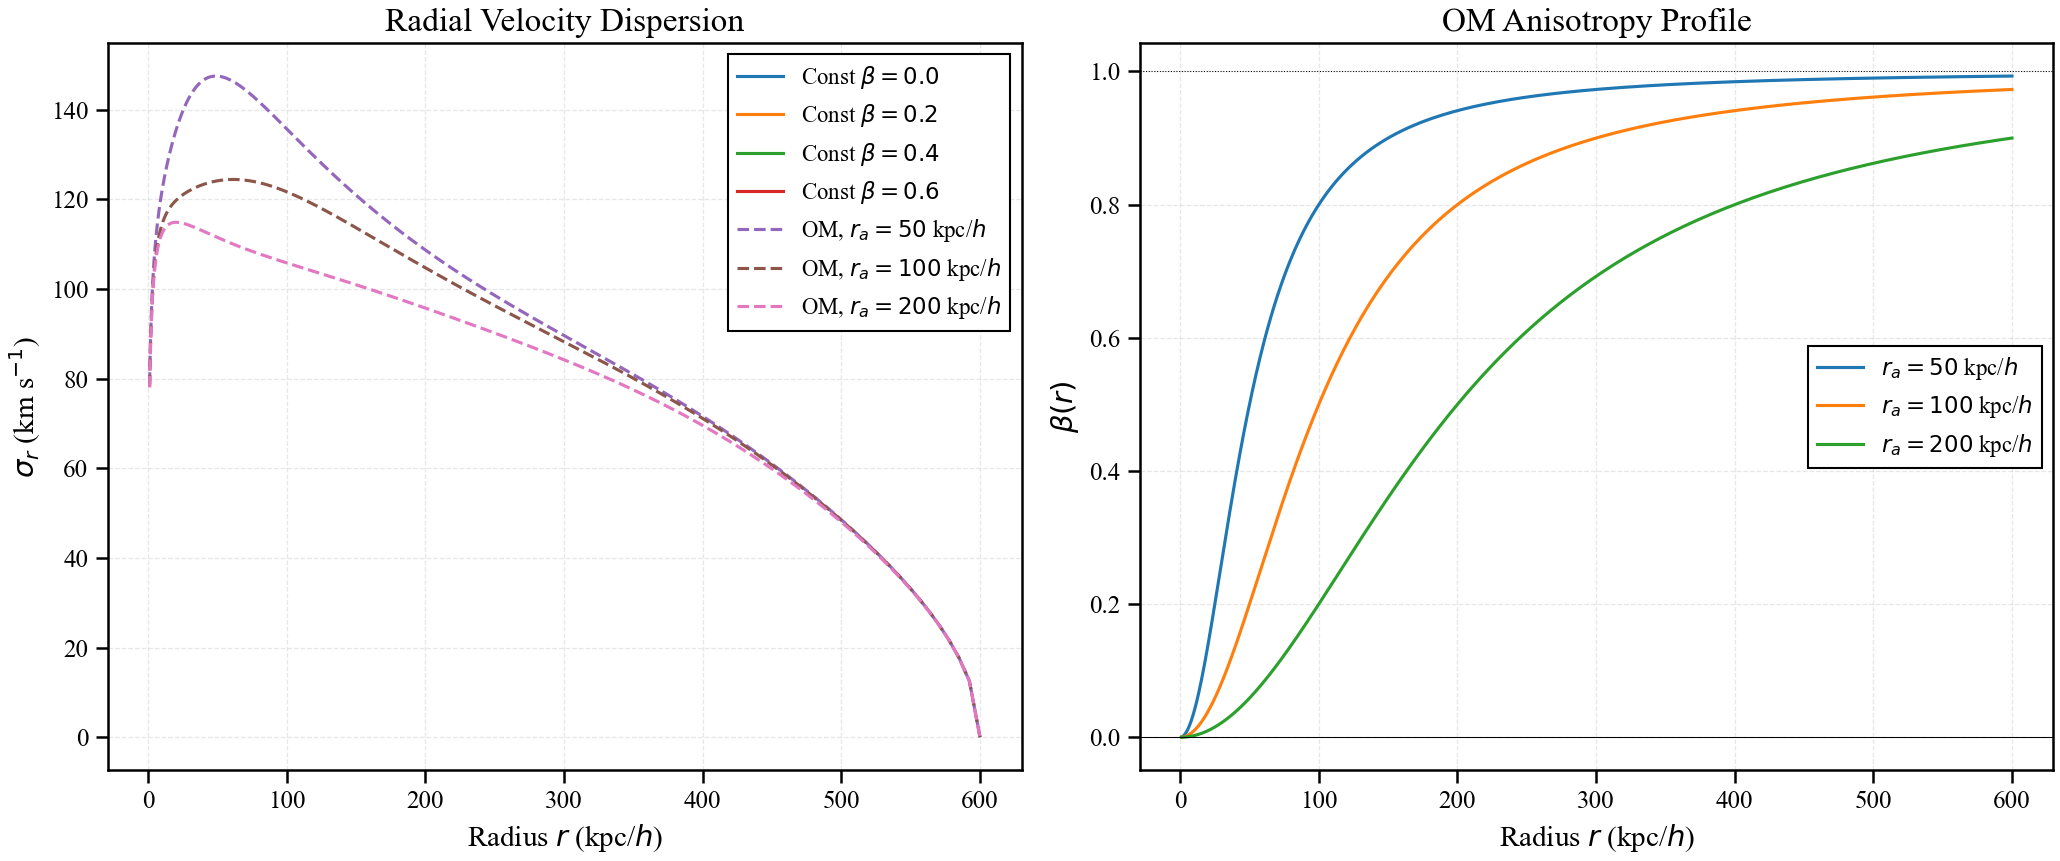

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from colossus.halo import profile_composite

# =========================================
# Cosmology and halo/profile specification
# =========================================
cosmology.setCosmology('planck18')

M   = 1e12   # Msun/h
c   = 10.0
z   = 0.0
mdef = 'vir'

# Composite profile
p = profile_composite.compositeProfile(
    'diemer23',
    outer_names=['mean', 'infalling'],
    M=M, c=c, z=z, mdef=mdef,
    pl_delta_1=10.0, pl_s=1.5
)

# =========================
# Radius grid (kpc/h)
# =========================
r = np.logspace(0, np.log10(600), 500)   # 1 ... 600 kpc/h

# Pull density and circular velocity
rho = p.density(r)           # Msun/h/kpc^3
Vc  = p.circularVelocity(r)  # km/s


# =====================================
# Jeans solver
# =====================================
def solve_sigma_r2(r, rho, Vc, beta=0.0):
    r = np.asarray(r)
    rho = np.asarray(rho)
    Vc = np.asarray(Vc)

    if np.isscalar(beta):
        beta_arr = np.full_like(r, float(beta))
    else:
        beta_arr = np.asarray(beta)
        if beta_arr.shape != r.shape:
            raise ValueError("beta array must have same shape as r")

    RHS = -rho * (Vc**2) / r

    integrand = 2.0 * beta_arr / r
    cum_int = np.zeros_like(r)
    cum_int[1:] = np.cumsum(0.5 * (integrand[1:] + integrand[:-1]) * (r[1:] - r[:-1]))
    mu = np.exp(cum_int)

    I = mu * RHS
    I_rev = I[::-1]
    r_rev = r[::-1]

    J_rev = np.zeros_like(I_rev)
    dr_rev = r_rev[:-1] - r_rev[1:]
    J_rev[1:] = np.cumsum(0.5 * (I_rev[1:] + I_rev[:-1]) * dr_rev)
    J = J_rev[::-1]

    y = J / mu
    sigma_r2 = np.where(rho > 0, y / rho, 0.0)
    return sigma_r2


# =====================================
# Anisotropy models
# =====================================
def beta_osipkov_merritt(r, ra):
    return r**2 / (r**2 + ra**2)


# =========================
# Make plots
# =========================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ---- Plot 1: sigma_r(r) ----
# Constant beta cases
beta_values = [0.0, 0.2, 0.4, 0.6]
for beta in beta_values:
    sigma_r2 = solve_sigma_r2(r, rho, Vc, beta=beta)
    ax1.plot(r, np.sqrt(sigma_r2), label=fr'Const $\beta={beta}$')

# OM cases
ra_values = [50, 100, 200]  # kpc/h
for ra in ra_values:
    beta_r = beta_osipkov_merritt(r, ra)
    sigma_r2 = solve_sigma_r2(r, rho, Vc, beta=beta_r)
    ax1.plot(r, np.sqrt(-sigma_r2), ls='--', label=fr'OM, $r_a={ra}$ kpc/$h$')

ax1.set_xlabel(r'Radius $r$ (kpc/$h$)')
ax1.set_ylabel(r'$\sigma_r$ (km s$^{-1}$)')
ax1.set_title('Radial Velocity Dispersion')
ax1.grid(True, which='both', ls='--', lw=0.6)
ax1.legend()

# ---- Plot 2: beta(r) for OM ----
for ra in ra_values:
    ax2.plot(r, beta_osipkov_merritt(r, ra), label=fr'$r_a={ra}$ kpc/$h$')

ax2.axhline(0, color='k', lw=0.5)
ax2.axhline(1, color='k', lw=0.5, ls=':')
ax2.set_xlabel(r'Radius $r$ (kpc/$h$)')
ax2.set_ylabel(r'$\beta(r)$')
ax2.set_title('OM Anisotropy Profile')
ax2.grid(True, which='both', ls='--', lw=0.6)
ax2.legend()

plt.tight_layout()
plt.show()


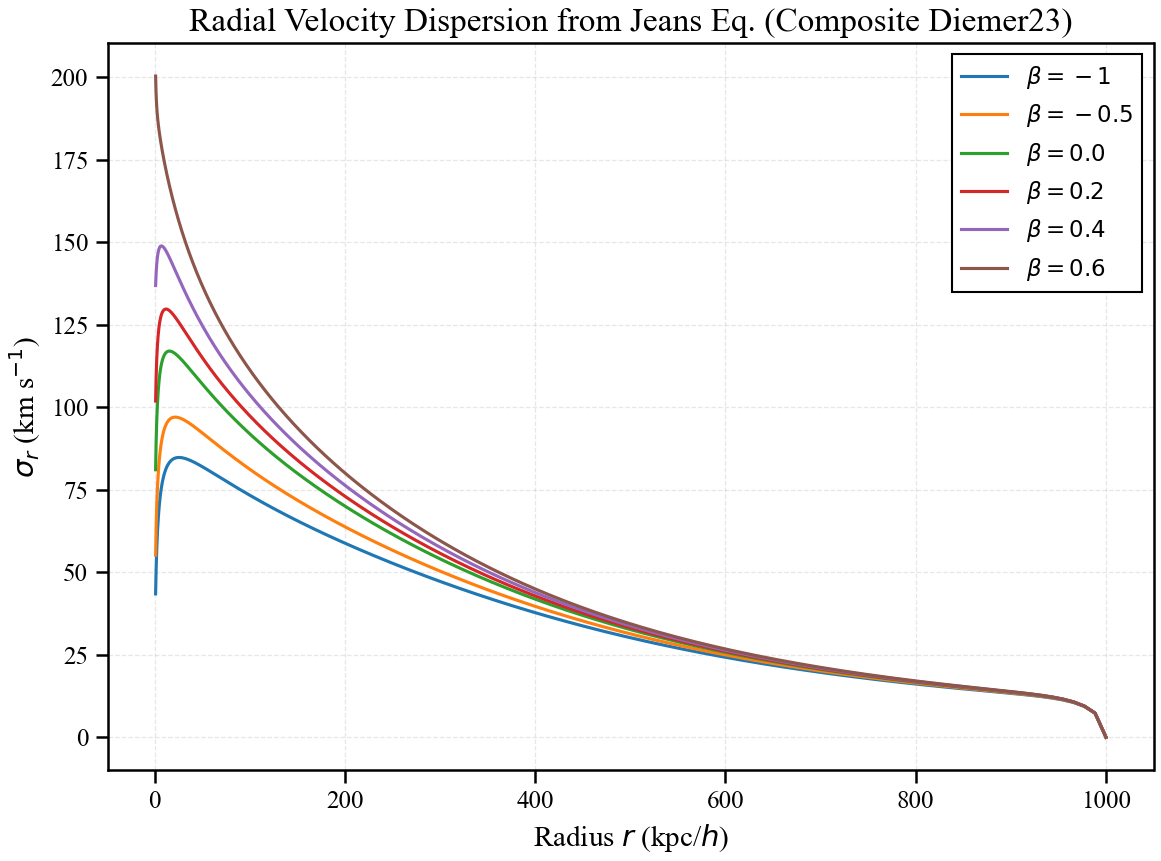

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from colossus.halo import profile_composite

# =========================================
# Cosmology and halo/profile specification
# =========================================
cosmology.setCosmology('planck18')

M   = 1e12   # Msun/h
c   = 10.0
z   = 0.0
mdef = 'vir'

# Composite profile
p = profile_composite.compositeProfile(
    'diemer23',
    outer_names=['mean', 'infalling'],
    M=M, c=c, z=z, mdef=mdef,
    pl_delta_1=10.0, pl_s=1.5
)

# =========================
# Radius grid (kpc/h)
# =========================
r = np.logspace(0, 3, 600)   # 1 ... 1000 kpc/h

# Pull density and circular velocity
rho = p_d23.density(r)           # Msun/h/kpc^3
Vc  = p_d23.circularVelocity(r)  # km/s


# =====================================
# Jeans solver
# =====================================
def solve_sigma_r2(r, rho, Vc, beta=0.0):
    r = np.asarray(r)
    rho = np.asarray(rho)
    Vc = np.asarray(Vc)

    if np.isscalar(beta):
        beta_arr = np.full_like(r, float(beta))
    else:
        beta_arr = np.asarray(beta)
        if beta_arr.shape != r.shape:
            raise ValueError("beta array must have same shape as r")

    RHS = -rho * (Vc**2) / r

    integrand = 2.0 * beta_arr / r
    cum_int = np.zeros_like(r)
    cum_int[1:] = np.cumsum(0.5 * (integrand[1:] + integrand[:-1]) * (r[1:] - r[:-1]))
    mu = np.exp(cum_int)

    I = mu * RHS
    I_rev = I[::-1]
    r_rev = r[::-1]

    J_rev = np.zeros_like(I_rev)
    dr_rev = r_rev[:-1] - r_rev[1:]
    J_rev[1:] = np.cumsum(0.5 * (I_rev[1:] + I_rev[:-1]) * dr_rev)
    J = J_rev[::-1]

    y = J / mu
    sigma_r2 = np.where(rho > 0, y / rho, 0.0)
    return sigma_r2


# =========================
# Plot for multiple betas
# =========================
beta_values = [-1,-0.5,0.0, 0.2, 0.4, 0.6]  # isotropic to radial
plt.figure(figsize=(8, 6))

for beta in beta_values:
    sigma_r2 =(solve_sigma_r2(r, rho, Vc, beta=beta))
    plt.plot(r, np.sqrt(-sigma_r2), label=fr'$\beta={beta}$')

plt.xlabel(r'Radius $r$ (kpc/$h$)')
plt.ylabel(r'$\sigma_r$ (km s$^{-1}$)')
plt.title('Radial Velocity Dispersion from Jeans Eq. (Composite Diemer23)')
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.6)
plt.tight_layout()
plt.show()


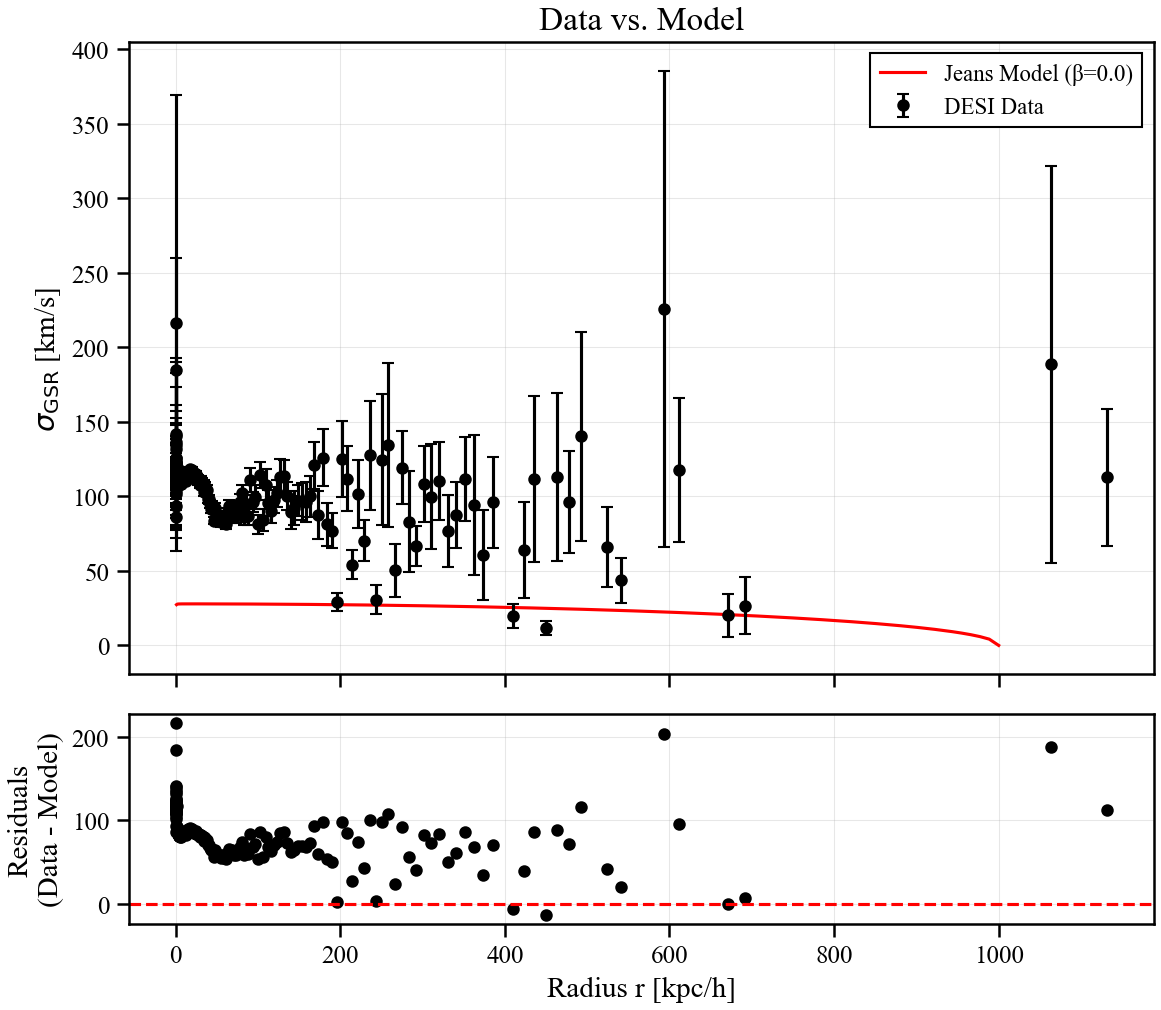

In [18]:
from scipy.interpolate import interp1d

# --- 1. Calculate your smooth model curve ---
# This is the same as your first line.
sigma_model = np.sqrt(np.abs(solve_sigma_r2(r, rho, Vc, beta=0.0)))

# --- 2. Create an interpolation function from your model ---
# This allows you to evaluate the model at any radius.
model_interpolator = interp1d(r, sigma_model, bounds_error=False, fill_value=0)

# --- 3. Evaluate the model at the exact locations of your data points ---
model_at_data_points = model_interpolator(r_desi)

# --- 4. Calculate the residuals correctly ---
residuals = sigma_desi - model_at_data_points

# --- 5. Plot everything using subplots for clarity ---
# It's best practice to show residuals on a separate panel.
fig, (ax1, ax2) = plt.subplots(
    2, 1, 
    sharex=True,  # Link the x-axes
    figsize=(8, 7), 
    gridspec_kw={'height_ratios': [3, 1]} # Make the top plot larger
)

# Plot data and model on the top panel (ax1)
ax1.plot(r, sigma_model, 'r-', label='Jeans Model (β=0.0)')
ax1.errorbar(r_desi, sigma_desi, yerr=error_desi, fmt='o', color='black', markersize=5, label='DESI Data')
ax1.set_ylabel(r'$\sigma_{\mathrm{GSR}}$ [km/s]')
ax1.set_title('Data vs. Model')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals on the bottom panel (ax2)
ax2.plot(r_desi, residuals, 'o', color='black', markersize=5)
ax2.axhline(0, color='red', linestyle='--') # Add a zero-line for reference
ax2.set_xlabel('Radius r [kpc/h]')
ax2.set_ylabel('Residuals\n(Data - Model)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Reading data from Sgsr.csv...
Cleaned data, 1486 valid rows remaining.
Found 13 surveys: RGB, BHB, DESI, BOSS_HALO+LAMOST_VMP, VARIABLE_STARS, Battaglia_et_al, BHATT_et_al_BHB, BHATT_et_al_Hg, BHATT_et_al_KG, Brown_et_al, Deason_et_al, giants, kafle_et_al_bhb

Creating separate DESI plot with three-component model...

Performing piecewise power-law fit for DESI...
  Fit for range 0.00 < r/rt <= 0.10:  σ₀ = 108.70, α = 0.02
  Fit for range 0.10 < r/rt <= 0.40:  σ₀ = 101.38, α = 0.20
  Fit for range 0.40 < r/rt <= 1.00:  σ₀ = 9199.16, α = 2.74
Saved DESI plot to sigma_gsr_desi_three_component_with_fits.pdf

Creating overlay plot for non-DESI surveys...
Fit for RGB: σ₀ = 76.43, α = 0.10
Fit for BHB: σ₀ = 86.35, α = 0.03
Fit for BOSS_HALO+LAMOST_VMP: σ₀ = 99.86, α = -0.36
Fit for VARIABLE_STARS: σ₀ = 108.31, α = -0.02
Fit for Battaglia_et_al: σ₀ = 101.60, α = 0.18
Fit for BHATT_et_al_BHB: σ₀ = 78.88, α = 0.11
Fit for BHATT_et_al_Hg: σ₀ = 123.26, α = 0.35
Fit for BHATT_et_al_KG: σ₀ = 88.76,

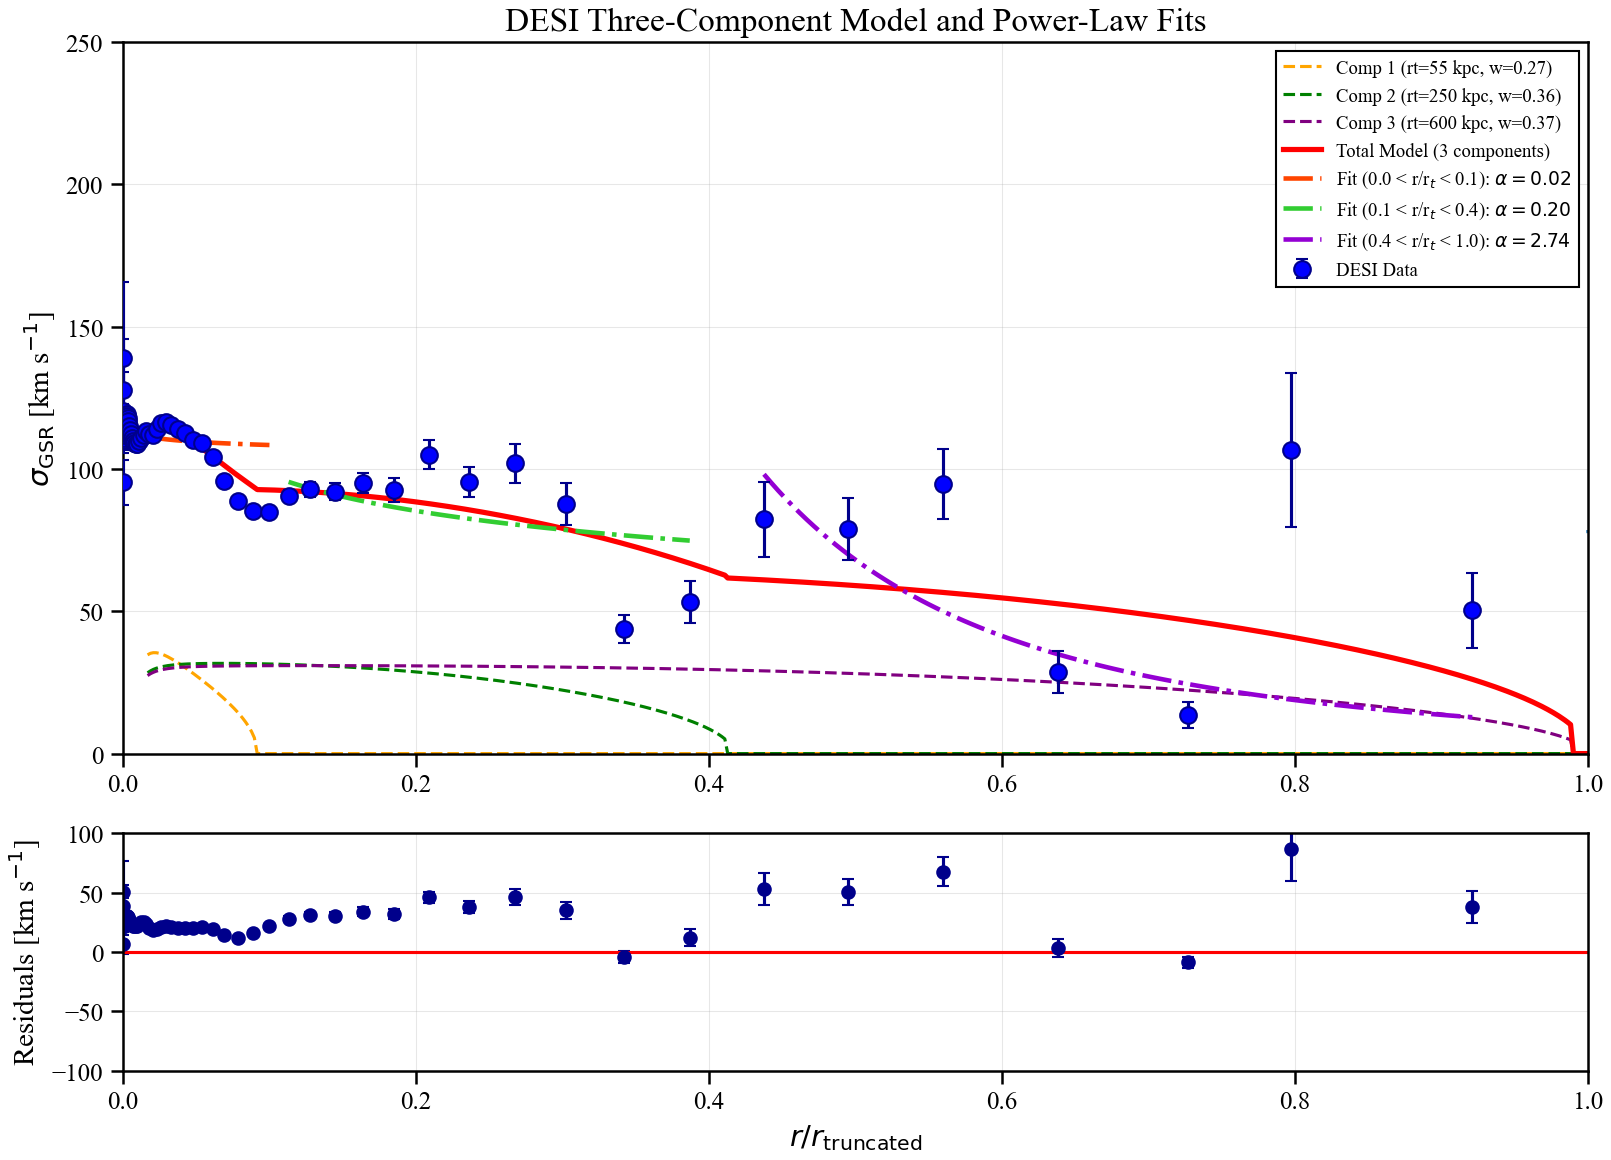

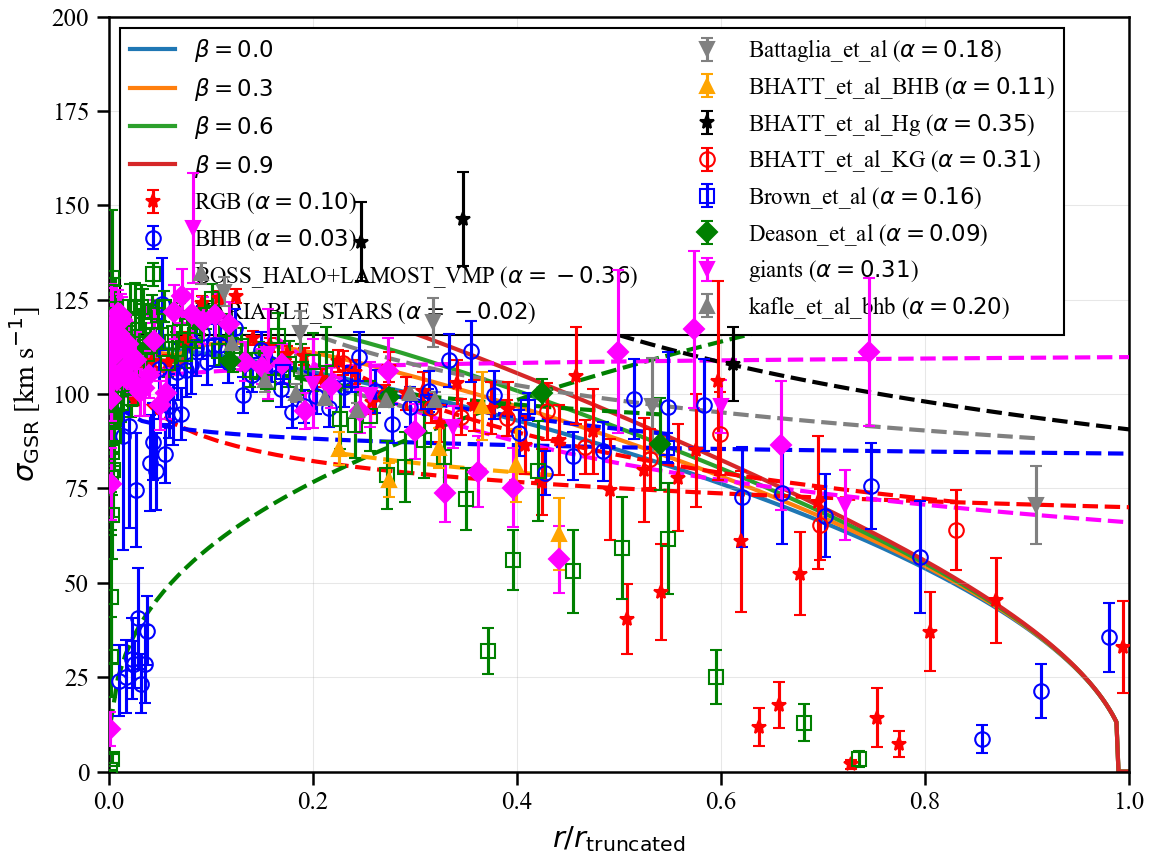

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.interpolate import UnivariateSpline
from scipy.ndimage import gaussian_filter1d
from math import factorial
from scipy.optimize import curve_fit

# ============================================
# PUBLICATION-READY CONFIGURATION
# ============================================

# Set publication-ready style
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times', 'DejaVu Serif'],
    'font.size': 12,
    'axes.linewidth': 1.2,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'xtick.major.size': 6,
    'xtick.minor.size': 3,
    'ytick.major.size': 6,
    'ytick.minor.size': 3,
    'xtick.major.width': 1.2,
    'xtick.minor.width': 0.8,
    'ytick.major.width': 1.2,
    'ytick.minor.width': 0.8,
    'legend.fontsize': 11,
    'legend.frameon': True,
    'legend.fancybox': False,
    'legend.edgecolor': 'black',
    'legend.facecolor': 'white',
    'legend.framealpha': 1.0,
    'grid.alpha': 0.3,
    'grid.linewidth': 0.5,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'errorbar.capsize': 3,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05
})

# File path
CSV_FILE = 'Sgsr.csv'

# ============================================
# TRUNCATED RADIUS CONFIGURATION
# ============================================
# Define truncated radius for each survey
DEFAULT_TRUNCATED_RADIUS = 120
DESI_TRUNCATED_RADIUS = 120
M = 1
K = 2.1
# Plot configuration - Publication style
X_LIMITS = (0, M)
Y_LIMITS = (0, 200)

# Default parameters for single component model
default_params = {'V0': 240, 'gamma': 4.5, 'n': 3, 'beta': 0.6, 'alpha': 0.0, 'rt': 120, 'R0': 8.0}

# ============================================
# THREE-COMPONENT PARAMETERS FOR DESI
# ============================================

# Component 1: Inner component
desi_component1_params = {
    'V0': 240, 'gamma': 3.5, 'n': 2, 'beta': 0.8, 'alpha': 0.0, 'rt': 55, 'R0': 8.0, 'weight': 2.5
}
# Component 2: Outer component
desi_component2_params = {
    'V0': 240, 'gamma': 8.5, 'n': 3, 'beta': 0.6, 'alpha': 0.0, 'rt': 250, 'R0': 8.0, 'weight': 3.4
}
# Component 3: Intermediate component
desi_component3_params = {
    'V0': 240, 'gamma': 9.5, 'n': 3, 'beta': 0.6, 'alpha': 0.0, 'rt': 600, 'R0': 8.0, 'weight': 3.5
}

# Choose plot types to generate
PLOT_OVERLAY = True
PLOT_DESI_SEPARATE = True

# Adaptive binning parameters
USE_ADAPTIVE_BINNING = True
MAX_BIN_SIZE = 25
MIN_POINTS_PER_BIN = MIN_BIN_SIZE = 2
TARGET_ERROR_RATIO = 0.0

# Figure sizes
OVERLAY_FIG_SIZE = (8, 6)
DESI_FIG_SIZE = (11, 8)

# Save settings
SAVE_FIGURES = True
DPI = 300
OVERLAY_OUTPUT = 'sigma_gsr_normalized_overlay_with_fits.pdf'
DESI_OUTPUT = 'sigma_gsr_desi_three_component_with_fits.pdf'

# ============================================
# FITTING FUNCTION
# ============================================
def power_law_model(x, sigma_prime_0, alpha):
    return sigma_prime_0 * np.power(x, -alpha)

def get_truncated_radius(survey_name):
    if 'DESI' in survey_name.upper():
        return DESI_TRUNCATED_RADIUS
    else:
        return DEFAULT_TRUNCATED_RADIUS

def adaptive_binning(r_values, sigma_values, errors,
                     min_bin_size=5, max_bin_size=35,
                     min_points=3, target_error_ratio=0.15):
    sort_idx = np.argsort(r_values)
    r_sorted, sigma_sorted, errors_sorted = np.array(r_values)[sort_idx], np.array(sigma_values)[sort_idx], np.array(errors)[sort_idx]
    
    bins = []
    current_bin_r, current_bin_sigma, current_bin_errors = [], [], []
    
    for i in range(len(r_sorted)):
        current_bin_r.append(r_sorted[i])
        current_bin_sigma.append(sigma_sorted[i])
        current_bin_errors.append(errors_sorted[i])
        
        if len(current_bin_r) >= min_points:
            bin_range = max(current_bin_r) - min(current_bin_r)
            weights = 1.0 / (np.array(current_bin_errors)**2 + 1e-10)
            weighted_avg = np.sum(np.array(current_bin_sigma) * weights) / np.sum(weights)
            combined_error = 1.0 / np.sqrt(np.sum(weights))
            relative_error = combined_error / (weighted_avg + 1e-10)
            
            close_bin = (bin_range >= max_bin_size) or \
                        (bin_range >= min_bin_size and relative_error <= target_error_ratio) or \
                        (i == len(r_sorted) - 1) or \
                        (len(current_bin_r) >= min_points * 2)
            
            if close_bin:
                bins.append((np.mean(current_bin_r), weighted_avg, combined_error))
                current_bin_r, current_bin_sigma, current_bin_errors = [], [], []
    
    if current_bin_r:
        weights = 1.0 / (np.array(current_bin_errors)**2 + 1e-10)
        weighted_avg = np.sum(np.array(current_bin_sigma) * weights) / np.sum(weights)
        combined_error = 1.0 / np.sqrt(np.sum(weights))
        bins.append((np.mean(current_bin_r), weighted_avg, combined_error))
    
    if bins:
        return map(np.array, zip(*bins))
    else:
        return r_values, sigma_values, errors

# ============================================
# DEHNEN MODEL FUNCTIONS
# ============================================

def h_function(q, x):
    if abs(q) < 1e-10:
        return -np.log(x)
    return (1/q) * (x**(-q) - 1)

def dehnen_sigma_r_squared(x, V0, gamma, n, beta, alpha=0.0):
    if x >= 0.99: return 0.0
    sum_term = sum(factorial(n) / (factorial(k) * factorial(n - k)) * (-1)**(n-k) * h_function(gamma * k / n - 2 * alpha - 2 * beta, x) for k in range(n + 1))
    denominator = (x**(-gamma/n) - 1)**n * x**(2*beta)
    if abs(denominator) < 1e-10: return 0.0
    return V0**2 * sum_term / denominator

def A_factor(x, rt=160, R0=8.0):
    r = x * rt
    if r <= R0: return 0.5
    term1 = (r**2 + R0**2) / (4 * r**2)
    term2 = ((r**2 - R0**2)**2) / (8 * r**3 * R0)
    term3 = np.log((r + R0) / (r - R0))
    return term1 - term2 * term3

def dehnen_sigma_gsr_normalized(x, V0, gamma, n, beta, alpha, rt, R0):
    if x >= 1.0 or x <= 0: return 0.0
    sigma_r_sq = dehnen_sigma_r_squared(x, V0, gamma, n, beta, alpha)
    if sigma_r_sq <= 0: return 0.0
    A = A_factor(x, rt, R0)
    correction = np.sqrt(max(0, 1 - beta * A))
    return np.sqrt(sigma_r_sq) * correction

def dehnen_sigma_gsr_physical(r, V0, gamma, n, beta, alpha, rt, R0):
    if rt <= 0: return 0.0
    return dehnen_sigma_gsr_normalized(r / rt, V0, gamma, n, beta, alpha, rt, R0)

def three_component_sigma_gsr(r, params1, params2, params3):
    w1, w2, w3 = params1.get('weight', 1/3), params2.get('weight', 1/3), params3.get('weight', 1/3)
    total_weight = w1 + w2 + w3
    w1_norm, w2_norm, w3_norm = w1 / total_weight, w2 / total_weight, w3 / total_weight
    
    sigma1 = dehnen_sigma_gsr_physical(r, **{k: v for k, v in params1.items() if k != 'weight'})
    sigma2 = dehnen_sigma_gsr_physical(r, **{k: v for k, v in params2.items() if k != 'weight'})
    sigma3 = dehnen_sigma_gsr_physical(r, **{k: v for k, v in params3.items() if k != 'weight'})
    
    return w1_norm * sigma1 + w2_norm * sigma2 + w3_norm * sigma3

# ============================================
# MAIN PLOTTING CODE
# ============================================

print(f"Reading data from {CSV_FILE}...")
df = pd.read_csv(CSV_FILE)

# --- FIX 1: ROBUST DATA CLEANING ---
# Convert all relevant columns to numeric, coercing errors to NaN
for col in ['e_gsr', 'sgsr', 'Bin_center']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with NaN values in these essential columns
df.dropna(subset=['sgsr', 'Bin_center', 'e_gsr'], inplace=True)
print(f"Cleaned data, {len(df)} valid rows remaining.")
# --- END FIX 1 ---

surveys = df['Survey'].unique()
print(f"Found {len(surveys)} surveys: {', '.join(surveys)}")

truncated_radii = {survey: get_truncated_radius(survey) for survey in surveys}

# ============================================
# SEPARATE DESI PLOT WITH THREE-COMPONENT MODEL
# ============================================

if PLOT_DESI_SEPARATE and 'DESI' in surveys:
    print("\nCreating separate DESI plot with three-component model...")
    fig_desi, (ax1, ax2) = plt.subplots(2, 1, figsize=DESI_FIG_SIZE, gridspec_kw={'height_ratios': [3, 1]})
    
    desi_data = df[df['Survey'] == 'DESI']
    r_desi, sigma_desi, error_desi = desi_data['Bin_center'].values, desi_data['sgsr'].values, desi_data['e_gsr'].values
    
    if USE_ADAPTIVE_BINNING:
        r_plot, sigma_plot, error_plot = adaptive_binning(r_desi, sigma_desi, error_desi, min_bin_size=MIN_BIN_SIZE, max_bin_size=MAX_BIN_SIZE, min_points=MIN_POINTS_PER_BIN, target_error_ratio=TARGET_ERROR_RATIO)
    else:
        r_plot, sigma_plot, error_plot = r_desi, sigma_desi, error_desi

    ax1.errorbar(r_plot / desi_component3_params['rt'], sigma_plot, yerr=error_plot, fmt='o', color='darkblue', markersize=8, markerfacecolor='blue', markeredgecolor='darkblue', label='DESI Data', zorder=10)
    
    r_model = np.linspace(10, 600, 500)
    
    w1, w2, w3 = desi_component1_params['weight'], desi_component2_params['weight'], desi_component3_params['weight']
    total_weight = w1 + w2 + w3
    w1_norm, w2_norm, w3_norm = w1 / total_weight, w2 / total_weight, w3 / total_weight

    sigma_comp1_weighted = w1_norm * np.array([dehnen_sigma_gsr_physical(r, **{k: v for k, v in desi_component1_params.items() if k != 'weight'}) for r in r_model])
    sigma_comp2_weighted = w2_norm * np.array([dehnen_sigma_gsr_physical(r, **{k: v for k, v in desi_component2_params.items() if k != 'weight'}) for r in r_model])
    sigma_comp3_weighted = w3_norm * np.array([dehnen_sigma_gsr_physical(r, **{k: v for k, v in desi_component3_params.items() if k != 'weight'}) for r in r_model])
    
    sigma_total = K * np.sqrt(sigma_comp1_weighted**2 + sigma_comp2_weighted**2 + sigma_comp3_weighted**2)
    
    ax1.plot(r_model/desi_component3_params['rt'], sigma_comp1_weighted, '--', color='orange', label=f'Comp 1 (rt={desi_component1_params["rt"]} kpc, w={w1_norm:.2f})')
    ax1.plot(r_model/desi_component3_params['rt'], sigma_comp2_weighted, '--', color='green', label=f'Comp 2 (rt={desi_component2_params["rt"]} kpc, w={w2_norm:.2f})')
    ax1.plot(r_model/desi_component3_params['rt'], sigma_comp3_weighted, '--', color='purple', label=f'Comp 3 (rt={desi_component3_params["rt"]} kpc, w={w3_norm:.2f})')
    ax1.plot(r_model/desi_component3_params['rt'], sigma_total, '-', color='red', linewidth=2.5, label='Total Model (3 components)')

    print("\nPerforming piecewise power-law fit for DESI...")
    x_desi_norm = r_plot / desi_component3_params['rt']
    fit_ranges = [(0.0, 0.1), (0.1, 0.4), (0.4, 1.0)]
    fit_colors = ['#FF4500', '#32CD32', '#9400D3']

    for i, (min_x, max_x) in enumerate(fit_ranges):
        # --- FIX 2: PRE-FIT VALIDATION ---
        # Create mask for the radial range
        range_mask = (x_desi_norm > min_x) & (x_desi_norm <= max_x)
        # Create mask for finite values within the data
        finite_mask = np.isfinite(x_desi_norm) & np.isfinite(sigma_plot) & np.isfinite(error_plot)
        # Combine masks
        mask = range_mask & finite_mask
        # --- END FIX 2 ---

        if np.sum(mask) < 2:
            print(f"  Skipping range {min_x}-{max_x}, not enough valid data points.")
            continue

        x_fit, y_fit, err_fit = x_desi_norm[mask], sigma_plot[mask], error_plot[mask]
        
        # Ensure errors for weighting are positive
        err_fit[err_fit <= 0] = 1e-6

        try:
            popt, _ = curve_fit(power_law_model, x_fit, y_fit, p0=[150, 0.5], sigma=err_fit, maxfev=10000)
            sigma_prime_0, alpha_val = popt
            r_trunc_desi = desi_component3_params['rt']
            sigma_0_val = sigma_prime_0 * (r_trunc_desi / 50.0)**alpha_val

            print(f"  Fit for range {min_x:.2f} < r/rt <= {max_x:.2f}:  σ₀ = {sigma_0_val:.2f}, α = {alpha_val:.2f}")

            x_line = np.linspace(x_fit.min(), x_fit.max(), 100)
            label = fr'Fit ({min_x:.1f} < r/r$_t$ < {max_x:.1f}): $\alpha={alpha_val:.2f}$'
            ax1.plot(x_line, power_law_model(x_line, *popt), color=fit_colors[i], linestyle='-.', linewidth=2.2, label=label, zorder=5)
            

        except (RuntimeError, ValueError) as e:
            print(f"  Could not fit power law for DESI in range {min_x}-{max_x}. Reason: {e}")
    ax1.plot(r,np.sqrt(-solve_sigma_r2(r, rho, Vc, beta=0.0)))
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 250)
    ax1.set_ylabel(r'$\sigma_{\mathrm{GSR}}$ [km s$^{-1}$]')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper right', fontsize=9)
    
    ax1.set_title('DESI Three-Component Model and Power-Law Fits')
    
    sigma_model_at_data = np.array([three_component_sigma_gsr(r, desi_component1_params, desi_component2_params, desi_component3_params) for r in r_plot])
    residuals = sigma_plot - sigma_model_at_data
    
    ax2.errorbar(r_plot/600, residuals, yerr=error_plot, fmt='o', color='darkblue')
    ax2.axhline(y=0, color='red', linestyle='-')
    ax2.set_xlim(0, 1)
    ax2.set_ylim(-100, 100)
    ax2.set_xlabel(r'$r/r_{\mathrm{truncated}}$')
    ax2.set_ylabel('Residuals [km s$^{-1}$]')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    if SAVE_FIGURES:
        plt.savefig(DESI_OUTPUT, dpi=DPI, bbox_inches='tight')
        print(f"Saved DESI plot to {DESI_OUTPUT}")

# ============================================
# OVERLAY PLOT
# ============================================

if PLOT_OVERLAY:
    print("\nCreating overlay plot for non-DESI surveys...")
    fig, ax = plt.subplots(figsize=OVERLAY_FIG_SIZE)
    ref_colors = ['red', 'blue', 'green', 'magenta', 'gray', 'orange', 'black']
    ref_markers = ['*', 'o', 's', 'D', 'v', '^']
    
    survey_idx = 0
    for survey in surveys:
        if survey == 'DESI': continue
        
        survey_data = df[df['Survey'] == survey]
        r_trunc = truncated_radii[survey]
        r_normalized, sgsr_vals, e_gsr_vals = survey_data['Bin_center'].values / r_trunc, survey_data['sgsr'].values, survey_data['e_gsr'].values

        if USE_ADAPTIVE_BINNING:
            r_plot, sigma_plot, error_plot = adaptive_binning(r_normalized, sgsr_vals, e_gsr_vals, min_bin_size=MIN_BIN_SIZE/r_trunc, max_bin_size=MAX_BIN_SIZE/r_trunc, min_points=MIN_POINTS_PER_BIN)
        else:
            r_plot, sigma_plot, error_plot = r_normalized, sgsr_vals, e_gsr_vals
        
        fit_params = None
        # --- FIX 2: PRE-FIT VALIDATION ---
        mask = np.isfinite(r_plot) & np.isfinite(sigma_plot) & np.isfinite(error_plot) & (r_plot > 0) & (sigma_plot > 0)
        # --- END FIX 2 ---
        
        if np.sum(mask) > 1:
            x_fit, y_fit, err_fit = r_plot[mask], sigma_plot[mask], error_plot[mask]
            err_fit[err_fit <= 0] = 1e-6 # Ensure errors are positive
            try:
                fit_params, _ = curve_fit(power_law_model, x_fit, y_fit, p0=[100, 0.5], sigma=err_fit, maxfev=5000)
            except (RuntimeError, ValueError) as e:
                print(f"Could not fit power law for {survey}. Reason: {e}")
        
        label_text = survey
        if fit_params is not None:
            sigma_prime_0_fit, alpha_fit = fit_params
            sigma_0_fit = sigma_prime_0_fit * (r_trunc / 50.0)**alpha_fit
            print(f"Fit for {survey}: σ₀ = {sigma_0_fit:.2f}, α = {alpha_fit:.2f}")
            label_text += fr' ($\alpha={alpha_fit:.2f}$)'
        
        color, marker = ref_colors[survey_idx % len(ref_colors)], ref_markers[survey_idx % len(ref_markers)]
        ax.errorbar(r_plot, sigma_plot, yerr=error_plot, fmt=marker, color=color, markersize=7, markerfacecolor='none' if marker in ['o', 's'] else color, label=label_text, zorder=10)
        
        if fit_params is not None:
            x_line_fit = np.linspace(x_fit.min(), x_fit.max(), 100)
            ax.plot(x_line_fit, power_law_model(x_line_fit, *fit_params), color=color, linestyle='--', linewidth=2.0, zorder=5)
        
        survey_idx += 1

    x_model = np.linspace(0.01, M, 500)
    for beta_val in [0.0, 0.3, 0.6, 0.9]:
        sigma_gsr = [dehnen_sigma_gsr_normalized(xi, **{**default_params, 'beta': beta_val}) for xi in x_model]
        ax.plot(x_model, sigma_gsr, linewidth=2, label=fr'$\beta = {beta_val}$', zorder=1)

    ax.set_xlim(0, M)
    ax.set_ylim(0, 200)
    ax.set_xlabel(r'$r/r_{\mathrm{truncated}}$')
    ax.set_ylabel(r'$\sigma_{\mathrm{GSR}}$ [km s$^{-1}$]')
    ax.legend(loc='upper left', ncol=2)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    if SAVE_FIGURES:
        plt.savefig(OVERLAY_OUTPUT, dpi=DPI, bbox_inches='tight')
        print(f"\nSaved overlay plot to {OVERLAY_OUTPUT}")
    
    plt.show()

Exception: Normalization of power law (delta_1) cannot be None.


SIGMA GSR ANALYSIS
Data loaded. Found 1761 total rows.

CREATING WEIGHTED AVERAGE PLOT


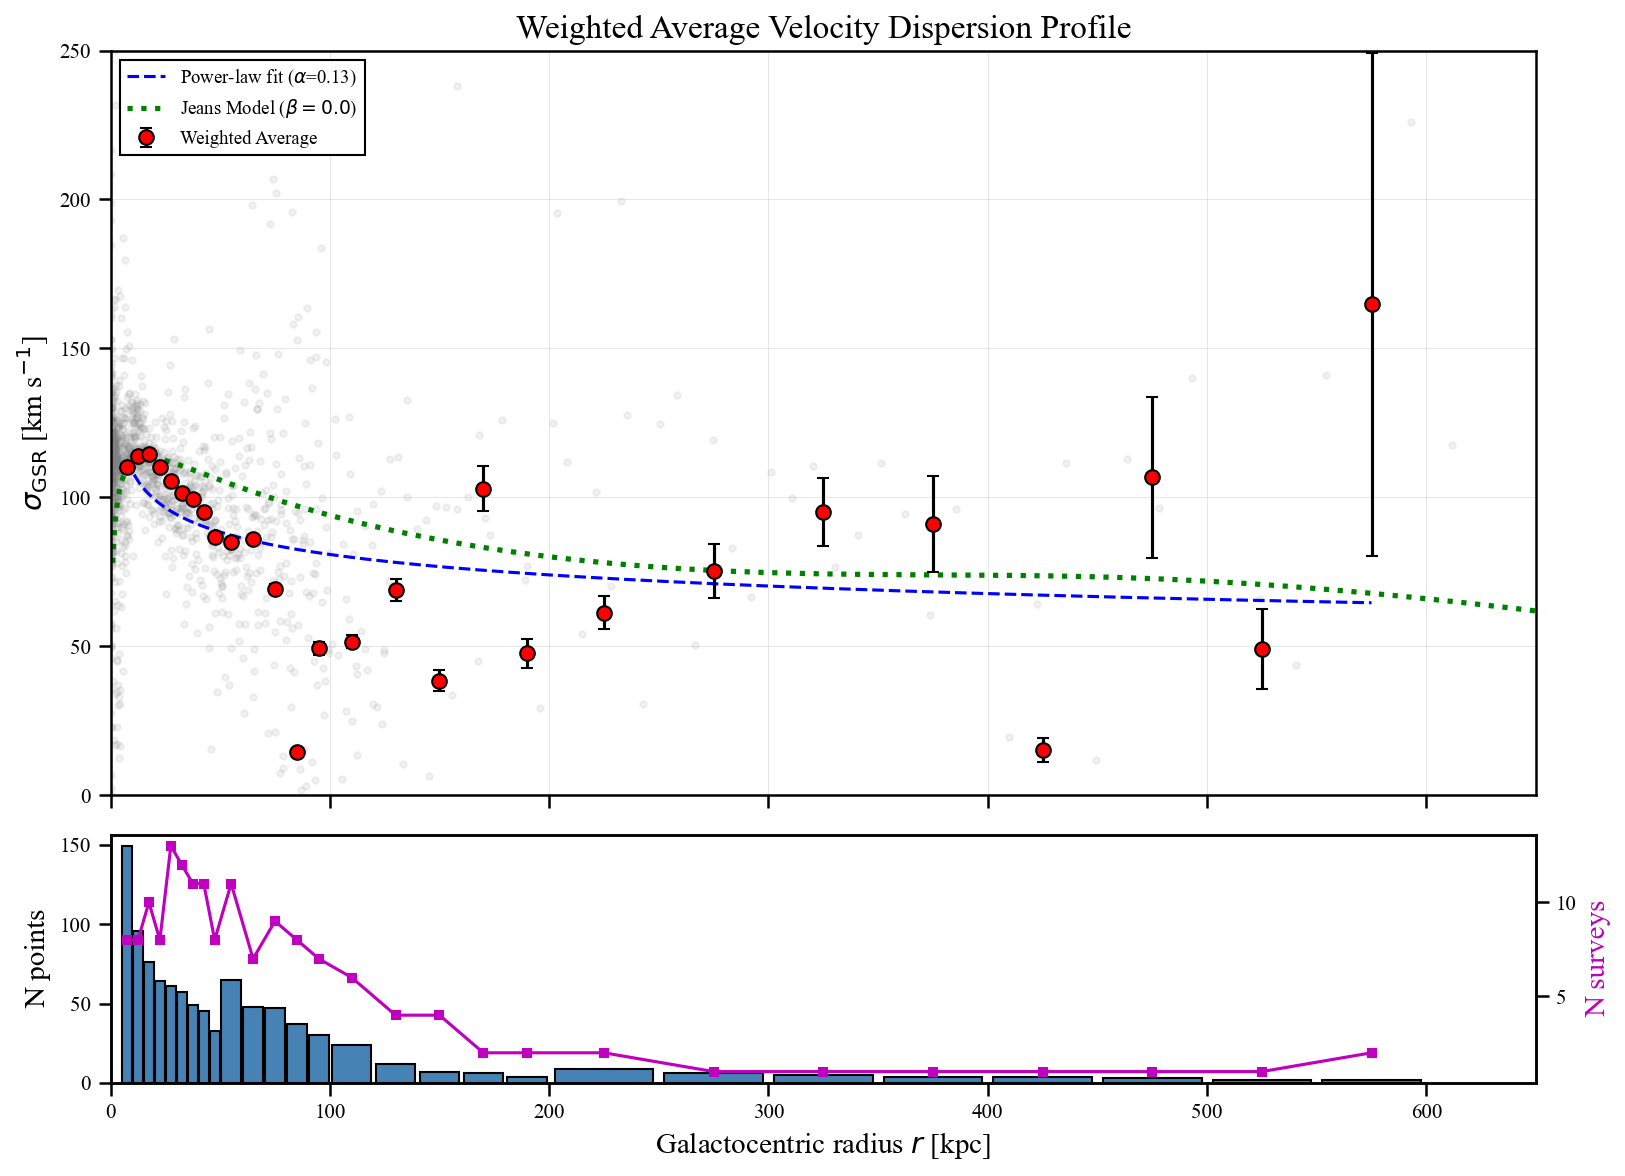


CREATING INDIVIDUAL PLOTS IN A GRID


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:263: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


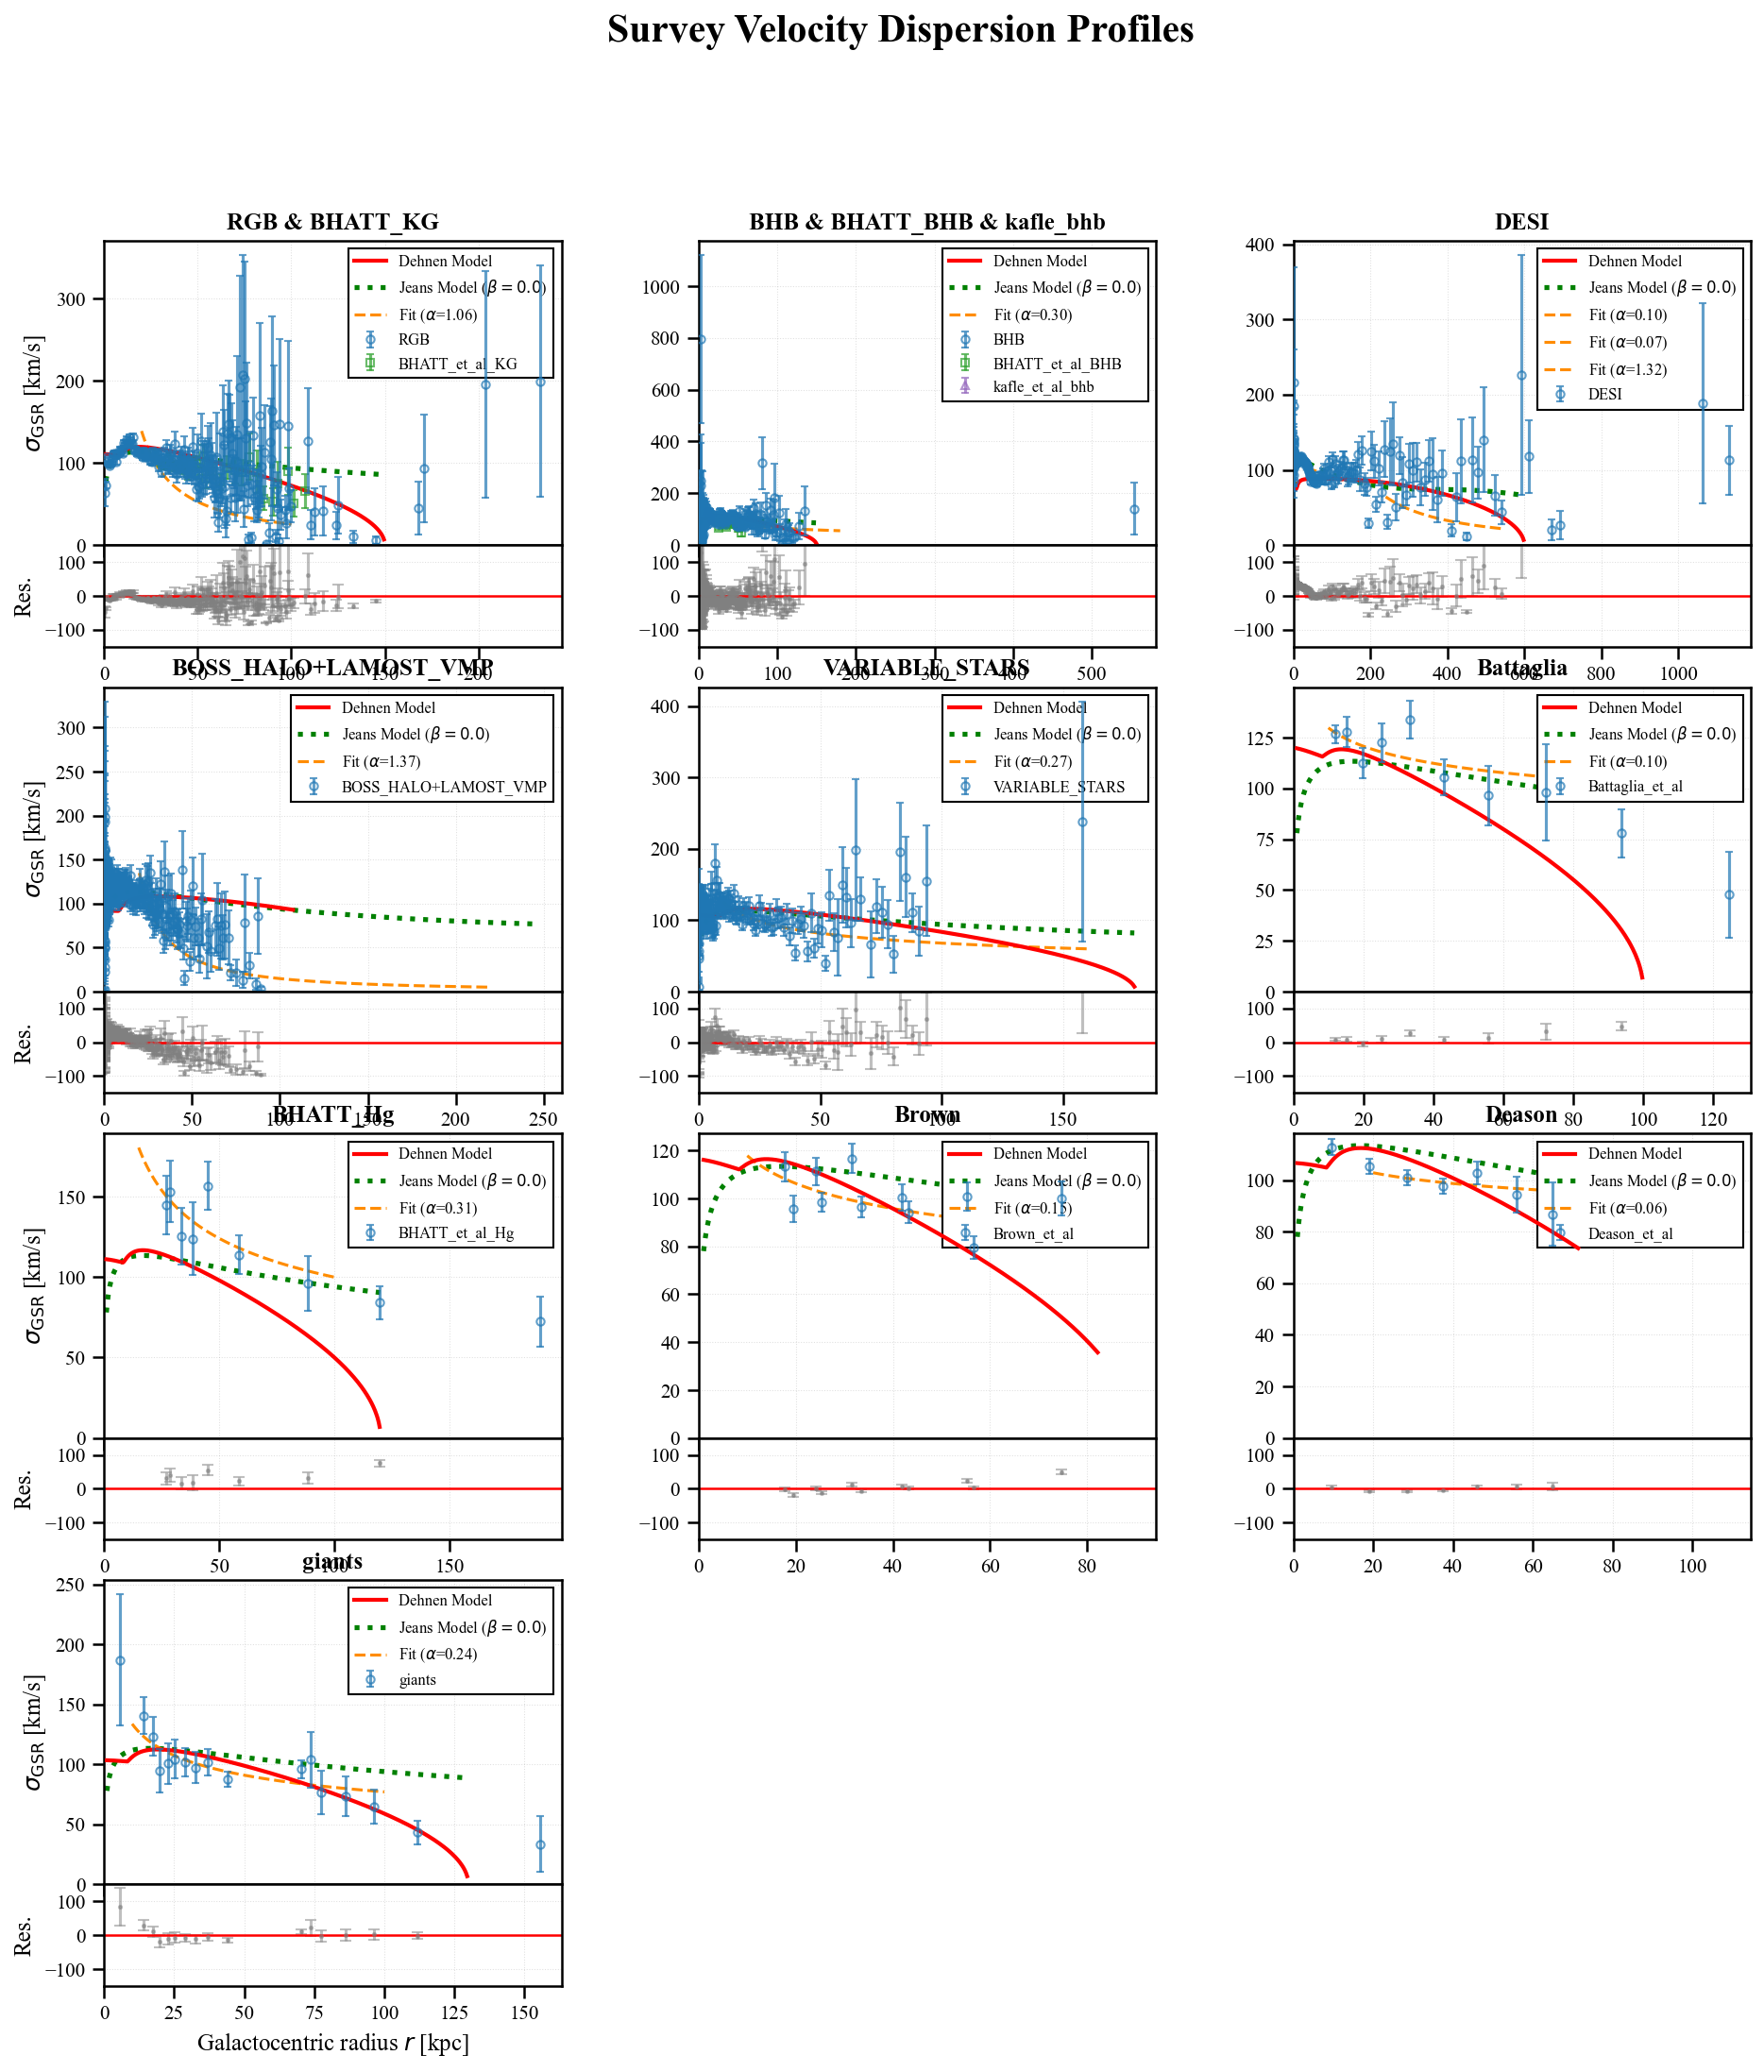


ANALYSIS COMPLETE


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from colossus.cosmology import cosmology
from colossus.halo import profile_composite

# ============================================
# PUBLICATION-READY CONFIGURATION
# ============================================
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'serif', 'font.serif': ['Times New Roman', 'Times', 'DejaVu Serif'], 'font.size': 12,
    'axes.linewidth': 1.2, 'axes.labelsize': 14, 'axes.titlesize': 16, 'xtick.labelsize': 10,
    'ytick.labelsize': 10, 'xtick.major.size': 6, 'xtick.minor.size': 3, 'ytick.major.size': 6,
    'ytick.minor.size': 3, 'xtick.major.width': 1.2, 'xtick.minor.width': 0.8, 'ytick.major.width': 1.2,
    'ytick.minor.width': 0.8, 'legend.fontsize': 9, 'legend.frameon': True, 'legend.fancybox': False,
    'legend.edgecolor': 'black', 'legend.facecolor': 'white', 'legend.framealpha': 1.0, 'grid.alpha': 0.3,
    'grid.linewidth': 0.5, 'lines.linewidth': 1.5, 'lines.markersize': 4, 'errorbar.capsize': 3,
    'figure.dpi': 150,
})

# File path
CSV_FILE = 'Sgsr.csv'

# ============================================
# PLOT CONFIGURATION (CONTROL PANEL)
# ============================================
PLOT_WEIGHTED_AVERAGE = True
PLOT_INDIVIDUAL_GRID = True
USE_ADAPTIVE_BINNING = False 

# ============================================
# SURVEY-SPECIFIC & FITTING PARAMETERS
# ============================================
#Dehnen Model 
SURVEY_PARAMS = {
    'RGB': {'V0': 240, 'gamma': 4.5, 'n': 3, 'beta': 0.55, 'alpha': 0.0, 'rt': 150, 'R0': 8.3},
    'BHB': {'V0': 240, 'gamma': 5.0, 'n': 3, 'beta': 0.6, 'alpha': 0.0, 'rt': 150, 'R0': 8.3},
    'DESI': {'V0': 240, 'gamma': 8.5, 'n': 3, 'beta': 0.6, 'alpha': 0.0, 'rt': 600, 'R0': 8.0},
    'BOSS_HALO+LAMOST_VMP': {'V0': 242, 'gamma': 6.0, 'n': 3, 'beta': 0.65, 'alpha': 0.0, 'rt': 250, 'R0': 8.3},
    'VARIABLE_STARS': {'V0': 240, 'gamma': 4.8, 'n': 3, 'beta': 0.5, 'alpha': 0.0, 'rt': 180, 'R0': 8.3},
    'Battaglia_et_al': {'V0': 240, 'gamma': 4.0, 'n': 3, 'beta': 0.4, 'alpha': 0.0, 'rt': 100, 'R0': 8.3},
    'BHATT_et_al_BHB': {'V0': 240, 'gamma': 4.5, 'n': 3, 'beta': 0.5, 'alpha': 0.0, 'rt': 120, 'R0': 8.3},
    'BHATT_et_al_Hg': {'V0': 240, 'gamma': 4.5, 'n': 3, 'beta': 0.5, 'alpha': 0.0, 'rt': 120, 'R0': 8.3},
    'BHATT_et_al_KG': {'V0': 240, 'gamma': 4.5, 'n': 3, 'beta': 0.5, 'alpha': 0.0, 'rt': 120, 'R0': 8.3},
    'Brown_et_al': {'V0': 240, 'gamma': 4.2, 'n': 3, 'beta': 0.45, 'alpha': 0.0, 'rt': 90, 'R0': 8.3},
    'Deason_et_al': {'V0': 240, 'gamma': 4.8, 'n': 3, 'beta': 0.5, 'alpha': 0.0, 'rt': 110, 'R0': 8.3},
    'giants': {'V0': 240, 'gamma': 5.0, 'n': 3, 'beta': 0.55, 'alpha': 0.0, 'rt': 130, 'R0': 8.3},
    'kafle_et_al_bhb': {'V0': 240, 'gamma': 5.2, 'n': 3, 'beta': 0.6, 'alpha': 0.0, 'rt': 150, 'R0': 8.3}
}
DEFAULT_PARAMS = {'V0': 240, 'gamma': 4.5, 'n': 3, 'beta': 0.6, 'alpha': 0.0, 'rt': 120, 'R0': 8.3}
# Polynomial fit 
FITTING_RANGES = {
    'RGB': [(20, 100)], 'BHB': [(15, 180)], 'DESI': [(10, 60), (60, 240), (240, 550)],
    'BOSS_HALO+LAMOST_VMP': [(20, 220)], 'VARIABLE_STARS': [(10, 160)], 'Battaglia_et_al': [(10, 80)],
    'BHATT_et_al_BHB': [(15, 100)], 'BHATT_et_al_Hg': [(15, 100)], 'BHATT_et_al_KG': [(15, 100)],
    'Brown_et_al': [(10, 70)], 'Deason_et_al': [(20, 90)], 'giants': [(10, 100)], 'kafle_et_al_bhb': [(20, 120)],
}

# ============================================
# NEW: COLOSSUS HALO & JEANS MODEL SETUP
# ============================================
cosmology.setCosmology('planck18')
p = profile_composite.compositeProfile('diemer23', outer_names=['mean', 'infalling'], M=1e12, c=10.0, z=0.0, mdef='vir', pl_delta_1=10.0, pl_s=1.5)
r_jeans_model = np.logspace(0, 3, 600)  # Radius grid in kpc/h
rho = p.density(r_jeans_model)
Vc = p.circularVelocity(r_jeans_model)

def solve_sigma_r2(r, rho, Vc, beta=0.0):
    r, rho, Vc = np.asarray(r), np.asarray(rho), np.asarray(Vc)
    beta_arr = np.full_like(r, float(beta)) if np.isscalar(beta) else np.asarray(beta)
    RHS = -rho * (Vc**2) / r
    integrand = 2.0 * beta_arr / r
    cum_int = np.zeros_like(r)
    cum_int[1:] = np.cumsum(0.5 * (integrand[1:] + integrand[:-1]) * (r[1:] - r[:-1]))
    mu = np.exp(cum_int)
    I_rev, r_rev = (mu * RHS)[::-1], r[::-1]
    J_rev = np.zeros_like(I_rev)
    J_rev[1:] = np.cumsum(0.5 * (I_rev[1:] + I_rev[:-1]) * (r_rev[:-1] - r_rev[1:]))
    sigma_r2 = np.where(rho > 0, (J_rev[::-1] / mu) / rho, 0.0)
    return sigma_r2

# Pre-calculate the isotropic Jeans model prediction
sigma_jeans_iso = np.sqrt(np.abs(solve_sigma_r2(r_jeans_model, rho, Vc, beta=0.0)))


# ============================================
# MODELS AND HELPER FUNCTIONS
# ============================================
def power_law_model(r, sigma_0, alpha):
    return sigma_0 * np.power(r/50.0, -alpha)

def get_survey_params(survey_name):
    return SURVEY_PARAMS.get(survey_name, DEFAULT_PARAMS).copy()

def get_fitting_ranges(survey_name):
    return FITTING_RANGES.get(survey_name, FITTING_RANGES.get('default', [(10, 100)]))

def adaptive_binning(r_values, sigma_values, errors):
    # (function unchanged)
    sort_idx = np.argsort(r_values); r_sorted, sigma_sorted, errors_sorted = np.array(r_values)[sort_idx], np.array(sigma_values)[sort_idx], np.array(errors)[sort_idx]
    bins, current_bin_r, current_bin_sigma, current_bin_errors = [], [], [], []
    for i in range(len(r_sorted)):
        current_bin_r.append(r_sorted[i]); current_bin_sigma.append(sigma_sorted[i]); current_bin_errors.append(errors_sorted[i])
        if len(current_bin_r) >= 1:
            bin_range = max(current_bin_r) - min(current_bin_r)
            if (bin_range >= 25) or (i == len(r_sorted) - 1):
                weights = 1.0 / (np.array(current_bin_errors)**2 + 1e-10); weighted_avg = np.sum(np.array(current_bin_sigma) * weights) / np.sum(weights); combined_error = 1.0 / np.sqrt(np.sum(weights)); bins.append((np.mean(current_bin_r), weighted_avg, combined_error)); current_bin_r, current_bin_sigma, current_bin_errors = [], [], []
    return map(np.array, zip(*bins)) if bins else (np.array([]), np.array([]), np.array([]))

def dehnen_sigma_gsr_physical(r, V0, gamma, n, beta, alpha, rt, R0):
    # (function unchanged)
    if rt <= 0 or r/rt >= 1.0 or r <= 0: return np.nan
    x = r / rt
    sum_term = sum(factorial(n) / (factorial(k) * factorial(n - k)) * (-1)**(n-k) * (lambda q, y: -np.log(y) if abs(q) < 1e-10 else (1/q) * (y**(-q) - 1))(gamma * k / n - 2 * alpha - 2 * beta, x) for k in range(n + 1))
    denominator = (x**(-gamma/n) - 1)**n * x**(2*beta)
    if abs(denominator) < 1e-10: return np.nan
    sigma_r_sq = V0**2 * sum_term / denominator
    if sigma_r_sq <= 0: return np.nan
    A = (lambda r_val: 0.5 if r_val <= R0 else ((r_val**2 + R0**2) / (4 * r_val**2)) - (((r_val**2 - R0**2)**2) / (8 * r_val**3 * R0)) * np.log((r_val + R0) / (r_val - R0)))(x * rt)
    correction = np.sqrt(max(0, 1 - beta * A))
    return np.sqrt(sigma_r_sq) * correction

# ============================================
# PLOTTING FUNCTIONS
# ============================================
def create_weighted_average_plot(df):
    print(f"\n{'='*60}\nCREATING WEIGHTED AVERAGE PLOT\n{'='*60}")
    
    radial_bins = np.concatenate([np.arange(5, 50, 5), np.arange(50, 100, 10), np.arange(100, 200, 20), np.arange(200, 650, 50)])
    r_centers, sigma_weighted, sigma_weighted_err, n_points_per_bin, surveys_per_bin = [], [], [], [], []
    
    for i in range(len(radial_bins) - 1):
        r_min, r_max = radial_bins[i], radial_bins[i+1]
        mask = (df['Bin_center'] >= r_min) & (df['Bin_center'] < r_max) & (df['e_gsr'] > 0)
        bin_data = df[mask]
        
        if not bin_data.empty:
            weights = 1.0 / (bin_data['e_gsr']**2); weighted_avg = np.sum(weights * bin_data['sgsr']) / np.sum(weights); weighted_error = np.sqrt(1.0 / np.sum(weights))
            r_centers.append((r_min + r_max) / 2); sigma_weighted.append(weighted_avg); sigma_weighted_err.append(weighted_error)
            n_points_per_bin.append(len(bin_data)); surveys_per_bin.append(bin_data['Survey'].nunique())
            
    r_centers, sigma_weighted, sigma_weighted_err = np.array(r_centers), np.array(sigma_weighted), np.array(sigma_weighted_err)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
    
    ax1.errorbar(r_centers, sigma_weighted, yerr=sigma_weighted_err, fmt='o', color='black', markersize=7, markerfacecolor='red', markeredgecolor='black', label='Weighted Average', zorder=10)
    for survey in df['Survey'].unique():
        ax1.scatter(df[df['Survey'] == survey]['Bin_center'], df[df['Survey'] == survey]['sgsr'], s=10, alpha=0.1, color='gray', zorder=0)

    try:
        popt, _ = curve_fit(power_law_model, r_centers, sigma_weighted, p0=[150, 0.5], sigma=sigma_weighted_err)
        r_model = np.linspace(r_centers.min(), r_centers.max(), 200)
        ax1.plot(r_model, power_law_model(r_model, *popt), 'b--', label=fr'Power-law fit ($\alpha$={popt[1]:.2f})')
    except Exception as e:
        print(f"Could not fit power law to weighted average: {e}")
        
    ax1.plot(r_jeans_model, sigma_jeans_iso, 'g:', lw=2.5, label=r'Jeans Model ($\beta=0.0$)')
    ax1.set_ylabel(r'$\sigma_{\mathrm{GSR}}$ [km s$^{-1}$]'); ax1.set_ylim(0, 250); ax1.grid(True, alpha=0.3)
    ax1.legend(); ax1.set_title('Weighted Average Velocity Dispersion Profile')

    width = (radial_bins[1:] - radial_bins[:-1]) * 0.9
    ax2.bar(r_centers, n_points_per_bin, width=width[:len(r_centers)], color='steelblue', edgecolor='black', label='N Points')
    ax2_twin = ax2.twinx()
    ax2_twin.plot(r_centers, surveys_per_bin, 'm-s', markersize=4, label='N Surveys')
    ax2.set_xlabel(r'Galactocentric radius $r$ [kpc]'); ax2.set_ylabel('N points'); ax2_twin.set_ylabel('N surveys', color='m')
    ax2.set_xlim(0, 650)
    fig.tight_layout(); plt.show()

def create_survey_subplot(axes, survey_names, df):
    main_ax, residual_ax = axes; primary_survey_name = survey_names[0]; params = get_survey_params(primary_survey_name)
    all_data_frames = [df[df['Survey'] == name] for name in survey_names]; combined_df = pd.concat(all_data_frames)
    all_r_data = []

    for i, survey_name in enumerate(survey_names):
        survey_data = df[df['Survey'] == survey_name];
        if survey_data.empty: continue
        r_data, s_data, e_data = survey_data['Bin_center'].values, survey_data['sgsr'].values, survey_data['e_gsr'].values
        all_r_data.extend(r_data)
        r_plot, s_plot, e_plot = (adaptive_binning(r_data, s_data, e_data) if USE_ADAPTIVE_BINNING else (r_data, s_data, e_data))
        main_ax.errorbar(r_plot, s_plot, yerr=e_plot, fmt=['o','s','^'][i], color=['#1f77b4','#2ca02c','#9467bd'][i], markersize=4, markerfacecolor='none', label=survey_name, zorder=10-i, capsize=2, ls='none', alpha=0.7)

    if not np.any(np.isfinite(all_r_data)):
        main_ax.text(0.5, 0.5, "No Data", ha='center', transform=main_ax.transAxes); return

    max_r = np.nanmax(all_r_data)
    r_model_dehnen = np.linspace(1, min(params['rt'], max_r * 1.1), 300)
    main_ax.plot(r_model_dehnen, np.array([dehnen_sigma_gsr_physical(r, **params) for r in r_model_dehnen]), '-r', lw=2, label=f'Dehnen Model', zorder=8)
    
    mask_jeans = r_jeans_model <= params['rt']
    main_ax.plot(r_jeans_model[mask_jeans], sigma_jeans_iso[mask_jeans], 'g:', lw=2.5, label=r'Jeans Model ($\beta=0.0$)')
    
    fitting_ranges = get_fitting_ranges(primary_survey_name)
    for r_min, r_max in fitting_ranges:
        mask = (combined_df['Bin_center'] >= r_min) & (combined_df['Bin_center'] <= r_max) & (combined_df['e_gsr'] > 0)
        fit_data = combined_df[mask]
        if len(fit_data) > 2:
            try:
                popt, _ = curve_fit(power_law_model, fit_data['Bin_center'], fit_data['sgsr'], sigma=fit_data['e_gsr'])
                r_fit_line = np.linspace(r_min, r_max, 100)
                main_ax.plot(r_fit_line, power_law_model(r_fit_line, *popt), '--', color='darkorange', label=fr'Fit ($\alpha$={popt[1]:.2f})')
            except Exception as e:
                print(f"Warning: Power-law fit failed for '{primary_survey_name}' group.")

    r_raw, s_raw, e_raw = combined_df['Bin_center'].values, combined_df['sgsr'].values, combined_df['e_gsr'].values
    model_at_data = np.array([dehnen_sigma_gsr_physical(r, **params) for r in r_raw])
    residuals = s_raw - model_at_data
    residual_ax.errorbar(r_raw, residuals, yerr=e_raw, fmt='.', color='gray', markersize=3, ls='none', alpha=0.5)
    residual_ax.axhline(0, color='red', lw=1.2)
    
    main_ax.set_title(" & ".join(s.replace("_et_al", "") for s in survey_names), fontsize=12, fontweight='bold')
    main_ax.set_xlim(left=0); main_ax.set_ylim(bottom=0); main_ax.grid(True, alpha=0.4, linestyle=':')
    main_ax.legend(loc='upper right', fontsize=8)
    residual_ax.set_ylim(-150, 150); residual_ax.grid(True, alpha=0.4, linestyle=':')

# ============================================
# MAIN EXECUTION
# ============================================

print(f"\n{'='*60}\nSIGMA GSR ANALYSIS\n{'='*60}")
df = pd.read_csv(CSV_FILE)
for col in ['e_gsr', 'sgsr', 'Bin_center']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(f"Data loaded. Found {len(df)} total rows.")

if PLOT_WEIGHTED_AVERAGE:
    create_weighted_average_plot(df)

if PLOT_INDIVIDUAL_GRID:
    print(f"\n{'='*60}\nCREATING INDIVIDUAL PLOTS IN A GRID\n{'='*60}")
    plot_groups = [
        ['RGB', 'BHATT_et_al_KG'], ['BHB', 'BHATT_et_al_BHB', 'kafle_et_al_bhb'], ['DESI'],
        ['BOSS_HALO+LAMOST_VMP'], ['VARIABLE_STARS'], ['Battaglia_et_al'],
        ['BHATT_et_al_Hg'], ['Brown_et_al'], ['Deason_et_al'], ['giants'],
    ]
    n_plots = len(plot_groups)
    ncols = 3
    nrows = int(np.ceil(n_plots / ncols))
    fig = plt.figure(figsize=(5 * ncols, 4 * nrows))
    outer_gs = GridSpec(nrows, ncols, figure=fig, wspace=0.3, hspace=0.1)
    
    for i in range(n_plots):
        inner_gs = outer_gs[i].subgridspec(2, 1, height_ratios=[3, 1], hspace=0)
        
        # FIX: Define main_ax *before* using it in the next line
        main_ax = fig.add_subplot(inner_gs[0])
        residual_ax = fig.add_subplot(inner_gs[1], sharex=main_ax)
        
        plt.setp(main_ax.get_xticklabels(), visible=False)
        create_survey_subplot((main_ax, residual_ax), plot_groups[i], df)
        
        current_row, current_col = i // ncols, i % ncols
        if current_row == nrows - 1:
            residual_ax.set_xlabel(r'Galactocentric radius $r$ [kpc]', fontsize=12)
        if current_col == 0:
            main_ax.set_ylabel(r'$\sigma_{\mathrm{GSR}}$ [km/s]', fontsize=12); residual_ax.set_ylabel('Res.', fontsize=12)
            
    for i in range(n_plots, nrows * ncols):
        fig.add_subplot(outer_gs[i]).set_visible(False)
        
    fig.suptitle("Survey Velocity Dispersion Profiles", fontsize=20, fontweight='bold')
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

print(f"\n{'='*60}\nANALYSIS COMPLETE\n{'='*60}")